# Assignment 2


#### 1.复现代码

In [5]:
import re
import math
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from collections import defaultdict
import random
#Get data
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""
#Get data from source using regular expression
def get_city_info(city_coordination):
    city_location = {}
    for line in city_coordination.split("\n"):
        if line.startswith("//"): continue
        if line.strip() == "":continue
            
        city = re.findall("name:'(\w+)'",line)[0]
        x_y = re.findall("geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]",line)[0]
        x_y = tuple(map(float,x_y))
        city_location[city] = x_y
    return city_location
city_info = get_city_info(coordination_source)

In [6]:
city_info

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

In [7]:
# Compute distance between cities
import math
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [11]:
def get_city_distance(city1,city2):
    return geo_distance(city_info[city1],city_info[city2])
get_city_distance("上海","北京")

727.52769688981

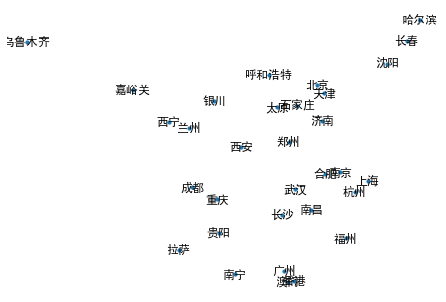

In [13]:
#Draw the graph
plt.rcParams['font.sans-serif'] = ['SimHei']
city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_info.keys()))
nx.draw(city_graph, city_info, with_labels=True, node_size=10)

In [14]:
# Bulid connection between
threshold = 700
def build_connection(city_info):
    cities_connection = defaultdict(list)
    cities = list(city_info.keys())
    for c1 in cities:
        for c2 in cities:
            if c1 == c2 : continue
            
            if get_city_distance(c1,c2) < threshold:
                cities_connection[c1].append(c2)
    return cities_connection
cities_connection = build_connection(city_info)
cities_connection

defaultdict(list,
            {'兰州': ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '嘉峪关': ['兰州', '西宁', '成都', '拉萨'],
             '西宁': ['兰州', '嘉峪关', '成都', '拉萨', '贵阳', '重庆', '银川'],
             '成都': ['兰州', '嘉峪关', '西宁', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '石家庄': ['武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '南昌',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特'],
             '拉萨': ['兰州', '嘉峪关', '西宁', '成都', '贵阳', '重庆', '南宁', '银川'],
             '贵阳': ['兰州', '西宁', '成都', '拉萨', '西安', '重庆', '南宁', '银川'],
             '武汉': ['石家庄',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '杭州',
              '南昌',
              '福州',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特',
  

E:\ANACONDA\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


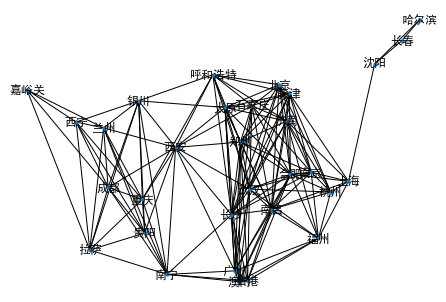

In [15]:
# Draw connection graph
cities_connection_graph = nx.Graph(cities_connection)
nx.draw(cities_connection_graph,city_info,with_labels=True,node_size=10)

In [24]:
# Search route using BFS 
def search_1(graph,start,destination):
    pathes = [[start]]
    visited = set()
    
    while pathes:
        path = pathes.pop(0)
        froniter  = path[-1]
#         print('path:{}'.format(path))
#         print('forniter:{}'.format(froniter))
        if froniter in visited: continue
            
        successors = graph[froniter]
        
        for city in successors:
            if city in path: continue
            
            new_path = path+[city]
#             print('new_pvath:{}'.format(new_path))
            
            pathes.append(new_path)
#             print('pathes:{}'.format(pathes))

            if city == destination:
                return new_path
        visited.add(froniter)
search_1(cities_connection,'上海','哈尔滨')

['上海', '沈阳', '哈尔滨']

In [ ]:
# Optimal search using variation of BFS


In [29]:
1.2 Machine Learning

SyntaxError: invalid syntax (<ipython-input-29-9c63dfa9fbec>, line 1)

Iteration 0, the loss is 139538.11021264404, parameters k is 76.73048188442598 and b is -89.22953199001074
Iteration 1, the loss is 117618.4350691883, parameters k is 72.00742159128947 and b is -89.97045336340037
Iteration 2, the loss is 99144.37130951372, parameters k is 67.67141812036003 and b is -90.65052747977965
Iteration 3, the loss is 83574.29415914293, parameters k is 63.69075038430724 and b is -91.27474105489202
Iteration 4, the loss is 70451.71827566564, parameters k is 60.036296984886945 and b is -91.84767212017692
Iteration 5, the loss is 59391.91445603374, parameters k is 56.681323156456905 and b is -92.37352351632931
Iteration 6, the loss is 50070.63009906544, parameters k is 53.601285170451895 and b is -92.85615364190777
Iteration 7, the loss is 42214.582728306465, parameters k is 50.77365076981211 and b is -93.29910468195267
Iteration 8, the loss is 35593.44786319843, parameters k is 48.1777343196366 and b is -93.70562852313924
Iteration 9, the loss is 30013.10633798748

Iteration 152, the loss is 93.10285828077687, parameters k is 19.06685517332888 and b is -98.05669587596144
Iteration 153, the loss is 93.10047741049749, parameters k is 19.066604847783072 and b is -98.05517329892321
Iteration 154, the loss is 93.09809667241777, parameters k is 19.066355405256253 and b is -98.05365062063
Iteration 155, the loss is 93.09571606375013, parameters k is 19.066106773853058 and b is -98.05212785238321
Iteration 156, the loss is 93.09333558214401, parameters k is 19.065858887570265 and b is -98.05060500455798
Iteration 157, the loss is 93.09095522561745, parameters k is 19.065611685813906 and b is -98.04908208667908
Iteration 158, the loss is 93.08857499249929, parameters k is 19.065365112955956 and b is -98.04755910749063
Iteration 159, the loss is 93.08619488138056, parameters k is 19.065119117927356 and b is -98.04603607502003
Iteration 160, the loss is 93.08381489107212, parameters k is 19.064873653844376 and b is -98.04451299663674
Iteration 161, the loss

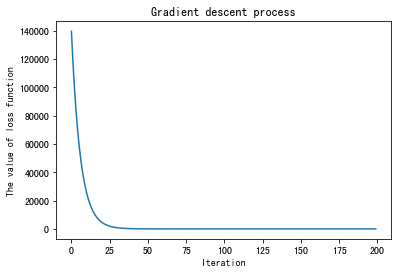

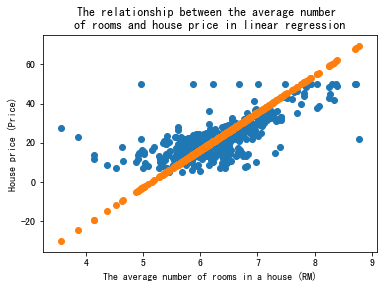

In [31]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline
import random
dataset = load_boston()
#dataset
x,y=dataset['data'],dataset['target']
dataset.feature_names
dataset['DESCR']
X_rm = x[:,5]
# Gradient descent
#Assume that the target funciton is a linear function:𝑦=𝑘∗𝑟𝑚+𝑏
#define target function
def price(rm, k, b):
    return k * rm + b
# define loss function 
def loss(y,y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))
# define partial derivative 
def partial_derivative_k(x, y, y_hat): 
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i-y_hat_i) * x_i
    return -2/n * gradient
def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i-y_hat_i)
    return -2 / n * gradient
#initialized parameters
k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100
learning_rate = 1e-3
iteration_num = 200 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b
# plot the relation between loss function and iteration
plt.plot(list(range(iteration_num)),losses)
plt.xlabel('Iteration')
plt.ylabel('The value of loss function')
plt.title('Gradient descent process')
plt.show()
# Regress the price function use best parameters and plot it
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]
plt.xlabel('The average number of rooms in a house (RM)')
plt.ylabel('House price (Price)')
plt.title('The relationship between the average number \nof rooms and house price in linear regression')

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)
plt.show()

In [22]:
2. 回答以下理论题目

SyntaxError: invalid syntax (<ipython-input-22-e3a372af0b6e>, line 1)

###### 2.1 What conditions are required to make the BFS return the optimal solution ?
1. All costs between two nodes are positive or zero.
2. Sort the list used to maintain the searching history in every iteration.


##### 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)

##### 2.3 In what conditions BFS is a better choice than DFS and vice versa ?
That heavily depends on the structure of the search tree and the number and location of solutions (aka searched-for items). If you know a solution is not far from the root of the tree, a breadth first search (BFS) might be better. If the tree is very deep and solutions are rare, depth first search (DFS) might take an extremely long time, but BFS could be faster. If the tree is very wide, a BFS might need too much memory, so it might be completely impractical. If solutions are frequent but located deep in the tree, BFS could be impractical. If the search tree is very deep you will need to restrict the search depth for depth first search (DFS), anyway (for example with iterative deepening).

##### 2.4 When can we use machine learning ?
1、A patten exists
2、we can not pin it down mathematiclly.
3、we have data on it.

##### 2.5 What is the gradient of a function ?
The original meaning of the gradient is a vector (vector), which means that the direction derivative of a function at that point gets the maximum value along that direction, that is, the function changes fastest at this point along the direction (the direction of this gradient) and changes The rate is the largest (modulus the gradient).

##### 2.6 How can we find the maximum value of a function using the information of gradient ?
If we need to find the maximum value of the loss function, then we need to iterate with the gradient ascent method.

#### 3. 实践部分  寻找地铁路线

### < 评阅点 >  1: 爬虫爬取数据是否完整;  2:搜索算法是否正确

In this part, although we recommend you to use Beijing subway, you still can use the subway map of any cities that you are interested in. 

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

### (Optional) Improve your agent to make it able to find a path based on different strategies

###  <评阅点> : 是否正确得到不同目标下的路径。

Some ideas you might want to try:

a. Find the shortest path between two stations.

b. Find the path that requires minimum transfers between two stations.

c. Combine the previous two ideas, find a more suitable path.

Compare your results with results obtained by using some apps such as Baidu map, A map, Google map or Apple map. If there is difference, try to explanate it.

In [26]:
import re
import math
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import requests
import json
import urllib
from urllib import request
#Build Graph
data="""
富锦路:121.431087,31.398542
友谊西路:121.434421,31.387459000000003
宝安公路:121.437463,31.375804
共富新村:121.43940800000001,31.357246999999997
呼兰路:121.444156,31.346106
通河新村:121.447965,31.337451
共康路:121.45346699999999,31.325349
彭浦新村:121.457393,31.314134999999997
汶水路:121.45654099999999,31.298973999999998
上海马戏城:121.45850300000001,31.285845000000002
延长路:121.46189199999999,31.278060999999997
中山北路:121.46565700000001,31.264959
上海火车站:121.462056,31.255923
汉中路:121.465207,31.247233
新闸路:121.46656399999999,31.241871999999997
人民广场:121.481099,31.238688
黄陂南路:121.479748,31.228732
陕西南路:121.465616,31.222063000000002
常熟路:121.45666299999999,31.219862
衡山路:121.44662199999999,31.202634999999997
徐家汇:121.443395,31.194557
上海体育馆:121.443398,31.188813
漕宝路:121.44046599999999,31.174838
上海南站:121.43586499999999,31.159439000000003
锦江乐园:121.415479,31.145542
莲花路:121.40933400000002,31.136734000000004
外环路:121.39961399999999,31.126649
莘庄:121.39218600000001,31.116871999999997
浦东国际机场:121.81508999999998,31.157478
海天三路:121.803326,31.174865999999998
远东大道:121.76203000000001,31.205140999999998
凌空路:121.730672,31.198565000000002
川沙:121.704499,31.192885999999998
华夏东路:121.687321,31.202995
创新中路:121.680196,31.21988
唐镇:121.662702,31.220411
广兰路:121.62346699999999,31.225499
金科路:121.608557,31.209932000000002
张江高科:121.59419399999999,31.207786
龙阳路:121.563934,31.209171
世纪公园:121.55897900000001,31.222046000000002
上海科技馆:121.547823,31.224356
世纪大道:121.53353,31.234807
东昌路:121.521998,31.239078999999997
陆家嘴:121.50898400000001,31.243812
南京东路:121.490857,31.243738
南京西路:121.46593200000001,31.23413
静安寺:121.45167099999999,31.229810999999998
江苏路:121.43771399999999,31.226557
中山公园:121.42286899999999,31.224321000000003
娄山关路:121.410371,31.217036
威宁路:121.393672,31.220484000000003
北新泾:121.38063999999999,31.222103999999998
淞虹路:121.36601100000001,31.223954
虹桥2号航站楼:121.332705,31.200616999999998
虹桥火车站:121.32699699999999,31.200546999999997
徐泾东:121.305802,31.194437
石龙路:121.449501,31.16426
龙漕路:121.45043000000001,31.176190999999996
漕溪路:121.444736,31.182979
宜山路:121.433631,31.192584999999998
虹桥路:121.428045,31.203165999999996
延安西路:121.423571,31.215712
金沙江路:121.419312,31.237993
曹杨路:121.424411,31.244676000000002
镇坪路:121.43686399999999,31.252825
中潭路:121.44746799999999,31.260932
宝山路:121.48291599999999,31.257395000000002
东宝兴路:121.486639,31.265746000000004
虹口足球场:121.48725900000001,31.277219
赤峰路:121.488997,31.286969
大柏树:121.489755,31.295206
江湾镇:121.491735,31.311313000000002
殷高西路:121.49148000000001,31.325554999999998
长江南路:121.49818,31.337847999999997
淞发路:121.50708799999998,31.350842999999998
张华浜:121.50538999999999,31.363487
淞滨路:121.499328,31.37691
水产路:121.500836,31.390755
宝杨路:121.486198,31.401162
友谊路:121.484673,31.409049
铁力路:121.473671,31.396195000000002
江杨北路:121.44623500000002,31.414233000000003
海伦路:121.495627,31.264854999999997
临平路:121.50761000000001,31.266581
大连路:121.51942700000001,31.263961
杨树浦路:121.52393899999998,31.257688
浦东大道:121.52601399999999,31.245793
浦电路:121.538688,31.228508
蓝村路:121.534376,31.217616999999997
塘桥:121.525332,31.215415999999998
南浦大桥:121.51478600000002,31.210031
西藏南路:121.49606399999999,31.207681
鲁班路:121.481325,31.205025
大木桥路:121.470251,31.19998
东安路:121.461147,31.197302
上海体育场:121.448551,31.188157
东川路:121.42632900000001,31.024465000000003
金平路:121.41618999999999,31.021828999999997
华宁路:121.387897,31.046931
文井路:121.38623600000001,31.013862
闵行开发区:121.37641,31.006296000000003
奉贤新城:121.50276299999999,30.919831
金海湖:121.499044,30.934607
望园路:121.49029399999999,30.937713000000002
环城东路:121.470082,30.937138
奉浦大道:121.45571799999999,30.948119000000002
萧塘:121.448398,30.972265999999998
西渡:121.43891200000002,30.995618
江川路:121.341154,30.99271
剑川路:121.422973,31.032572
北桥:121.41648500000001,31.051134
颛桥:121.40843500000001,31.072841999999998
银都路:121.396872,31.095083000000002
春申路:121.39233200000001,31.103958000000002
港城路:121.58131000000002,31.359261
外高桥保税区北:121.59347199999999,31.353846
航津路:121.60053700000002,31.341308
外高桥保税区南:121.60853300000001,31.327471999999997
洲海路:121.59592099999999,31.318309999999997
五洲大道:121.59588899999999,31.308621999999996
东靖路:121.595386,31.296646000000003
巨峰路:121.59553500000001,31.286324
五莲路:121.59454,31.278011
博兴路:121.593248,31.269584000000002
金桥路:121.588349,31.263288
云山路:121.579178,31.256687
德平路:121.57073799999999,31.251724
北洋泾路:121.55923100000001,31.245588
民生路:121.54994599999999,31.242122
源深体育中心:121.543447,31.237807
上海儿童医学中心:121.52927700000001,31.211585999999997
临沂新村:121.52355,31.198788
高科西路:121.516554,31.191403
东明路:121.517991,31.178413
高青路:121.522079,31.165542
华夏西路:121.521254,31.155549
上南路:121.51574,31.150646000000002
灵岩南路:121.501805,31.154359000000003
东方体育中心:121.48398,31.161852000000003
花木路:121.569227,31.217570000000002
芳华路:121.556518,31.199407
锦绣路:121.546552,31.193648
杨高南路:121.53188899999999,31.193346999999996
云台路:121.50693100000001,31.187786
耀华路:121.50116100000001,31.184168
长清路:121.49264099999999,31.180328000000003
后滩:121.480232,31.177838
龙华中路:121.463296,31.190695
肇嘉浜路:121.45658300000001,31.205472999999998
昌平路:121.44903899999998,31.240163
长寿路:121.444768,31.24672
岚皋路:121.428339,31.262583000000003
新村路:121.429033,31.270157
大华三路:121.42948799999999,31.280185999999997
行知路:121.42806100000001,31.291221999999998
大场镇:121.42294299999999,31.299716999999998
场中路:121.42776299999998,31.309189
上大路:121.41501299999999,31.320778999999998
南陈路:121.405309,31.327454
上海大学:121.39903000000001,31.321440000000003
祁华路:121.38015800000001,31.328112
顾村公园:121.38368899999999,31.346915000000003
刘行:121.368893,31.363422999999997
潘广路:121.384541,31.373631
罗南新村:121.364047,31.394509999999997
美兰湖:121.356426,31.407853000000003
沈杜公路:121.519044,31.067094
联航路:121.51721200000001,31.079252
江月路:121.515208,31.089985
浦江镇:121.523046,31.081471999999998
芦恒路:121.504775,31.124756
凌兆新村:121.49616,31.146942
杨思:121.500277,31.166695
成山路:121.50338799999999,31.176614
中华艺术宫:121.50131499999999,31.190005
陆家浜路:121.492695,31.217389
老西门:121.49006599999998,31.224795
大世界:121.48583400000001,31.234153000000003
曲阜路:121.478141,31.248374
中兴路:121.475416,31.259014
西藏北路:121.475222,31.269378000000003
曲阳路:121.49733,31.282156
四平路:121.50801399999999,31.280545
鞍山新村:121.516196,31.278969
江浦路:121.524796,31.280815000000004
黄兴路:121.534906,31.284713
延吉中路:121.54138999999999,31.294434000000003
黄兴公园:121.536425,31.299442
翔殷路:121.538472,31.311024
嫩江路:121.538559,31.320922999999997
市光路:121.538509,31.328749
曹路:121.689449,31.277549
民雷路:121.674604,31.274648
顾唐路:121.663078,31.27215
金海路:121.645331,31.269219
金吉路:121.63511299999999,31.270009
金桥:121.617822,31.266301000000002
台儿庄路:121.604368,31.258499
蓝天路:121.584193,31.247135999999998
芳甸路:121.56497399999999,31.237864000000002
杨高中路:121.55514699999999,31.233821000000002
商城路:121.522907,31.236131
小南门:121.50489499999999,31.222656
马当路:121.48336499999999,31.215683000000002
打浦桥:121.475401,31.212072999999997
嘉善路:121.46735,31.208615
桂林路:121.424966,31.181040000000003
漕河泾开发区:121.40433600000001,31.176267
合川路:121.39126,31.172140000000002
星中路:121.375569,31.163861999999998
七宝:121.35604199999999,31.161389
中春路:121.34406499999999,31.155656
九亭:121.325928,31.143604999999997
泗泾:121.26698400000001,31.123981
佘山:121.201875,31.101349
洞泾:121.23703799999998,31.090390999999997
松江大学城:121.239201,31.060041
松江新城:121.23725900000001,31.036209000000003
松江体育中心:121.23829199999999,31.021237
醉白池:121.23751599999999,31.007759999999998
松江南站:121.236737,30.989169
基隆路:121.59744719,31.35648661
高桥:121.58662,31.345034000000002
高桥西:121.55839332,31.35798865
双江路:121.54585,31.373890999999997
国帆路:121.51115300000001,31.349854999999998
新江湾城:121.51318799999999,31.334451
殷高东路:121.51356200000001,31.327539
三门路:121.495704,31.317195
江湾体育场:121.523234,31.312296000000003
五角场:121.52221499999999,31.305458
国权路:121.51676699999999,31.295034
同济大学:121.508532,31.289027
邮电新村:121.500847,31.274176
四川北路:121.491992,31.252052000000003
天潼路:121.48878300000001,31.250088
豫园:121.498731,31.232713
新天地:121.481834,31.223399
上海图书馆:121.451117,31.213841
交通大学:121.43944599999999,31.205568
宋园路:121.419122,31.202213
伊犁路:121.410676,31.204628999999997
水城路:121.39846299999999,31.205053000000003
龙溪路:121.38674099999999,31.200046999999998
上海动物园:121.36928400000001,31.199022999999997
虹桥1号航站楼:121.3537,31.197605
龙柏新村:121.376928,31.183294
紫藤路:121.370949,31.175525
航中路:121.36145,31.171346000000003
迪斯尼:121.67196399999999,31.148266999999997
康新公路:121.64491000000001,31.054859000000004
秀沿路:121.60505800000001,31.143946000000003
罗山路:121.599625,31.159349
御桥:121.57710800000001,31.164485
浦三路:121.545548,31.15715
三林东:121.52966299999999,31.152355
三林:121.518178,31.148733
龙耀路:121.468651,31.169251000000003
云锦路:121.46486100000001,31.173022999999997
龙华:121.45930600000001,31.179084000000003
上海游泳馆:121.44794099999999,31.185596999999998
隆德路:121.430024,31.236732
枫桥路:121.41766000000001,31.247996
真如:121.413799,31.25661
上海西站:121.409305,31.268790000000003
李子园:121.396612,31.274712
祁连山路:121.382499,31.277205
武威路:121.371466,31.282573
桃浦新村:121.356054,31.28755
南翔:121.32976399999998,31.303351
马陆:121.28363200000001,31.325467
嘉定新城:121.26104,31.335744000000002
白银路:121.25196799999999,31.351118
嘉定西:121.234404,31.383236
嘉定北:121.24401,31.397409000000003
迪士尼:121.67196399999999,31.148266999999997
上海赛车场:121.232629,31.337943
昌吉东路:121.206814,31.299938
上海汽车城:121.18726200000002,31.291579
安亭:121.168605,31.294334999999997
兆丰路:121.156828,31.294652000000003
花桥:121.10438199212747,31.298791967028116
申江路:121.62975,31.193026
金京路:121.62220500000001,31.285413000000002
杨高北路:121.60942800000001,31.285815000000003
东陆路:121.585783,31.288631
复兴岛:121.568766,31.292789000000003
爱国路:121.559427,31.286351
隆昌路:121.550831,31.281347999999998
宁国路:121.53891200000001,31.274518
江浦公园:121.530635,31.271843
提篮桥:121.51328000000001,31.259140999999996
国际客运中心:121.504856,31.255834999999998
桂林公园:121.42437199999999,31.171505
虹漕路:121.41703100000001,31.170192
虹梅路:121.40393200000001,31.166072999999997
东兰路:121.39854299999999,31.161429
顾戴路:121.35011399999999,31.128185
虹莘路:121.38771399999999,31.14657
七莘路:121.36970600000001,31.137624
金运路:121.326035,31.247367999999998
金沙江西路:121.341338,31.24734
丰庄:121.361841,31.248390999999998
祁连山南路:121.373928,31.24323
真北路:121.38851799999999,31.237924
大渡河路:121.40126799999999,31.237503000000004
武宁路:121.43701899999999,31.240622
江宁路:121.451187,31.250743
自然博物馆:121.46915200000001,31.241120000000002
淮海中路:121.470677,31.226197999999997
世博会博物馆:121.48881000000002,31.200208
世博大道:121.49083300000001,31.188554999999997
华鹏路:121.53311299999999,31.182301000000002
下南路:121.546792,31.185469
北蔡:121.55876699999999,31.186466999999997
陈春路:121.56403600000002,31.181339
莲溪路:121.57281100000002,31.175345
华夏中路:121.58878200000001,31.181248999999998
中科路:121.608609,31.184627000000003
学林路:121.621008,31.189116
张江路:121.635521,31.194945
滴水湖:121.93633200000001,30.913248
临港大道:121.91725500000001,30.929828999999998
书院:121.563142,31.239589000000002
惠南东:121.800265,31.032830999999998
惠南:121.76826499999999,31.059628999999997
野生动物园:121.72799499999999,31.06138
新场:121.655561,31.051514
航头东:121.62411499999999,31.060571999999997
鹤沙航城:121.61785,31.083657000000002
周浦东:121.61360900000001,31.115609999999997
诸光路:121.299628,31.19787
蟠龙路:121.285105,31.192474
徐盈路:121.26061200000001,31.183963000000002
徐泾北城:121.24821599999999,31.18122
嘉松中路:121.230525,31.170108000000003
赵巷:121.198528,31.167477
汇金路:121.15833700000002,31.166940000000004
青浦新城:121.13191200000001,31.164547999999996
漕盈路:121.103124,31.16668
淀山湖大道:121.088481,31.140732
朱家角:121.06083799999999,31.116640000000004
东方绿洲:121.01713899999999,31.114696999999996
三鲁公路:121.509662,31.13557
闵瑞路:121.536901,31.054121000000002
浦航路:121.540302,31.046746000000002
东城一路:121.538678,31.036462
汇臻路:121.53118500000001,31.031162
春申:121.36073999999999,31.085401
新桥:121.321693,31.065788
车墩:121.31663700000001,31.018489000000002
叶榭:121.328826,30.953096999999996
亭林:121.319998,30.889087
金山园区:121.37456,30.835669
金山卫:121.369495,30.733825
"""
#Get data from source using regular expression
def get_station_info(station_coordination):
    station_location = {}
    for line in station_coordination.split("\n"):
        if line.startswith("//"): continue
        if line.strip() == "":continue
        try:
            station = re.findall("(.+):",line)[0]#\w+ represents the chracter we are looking for;() means that I just need to return the things in parentheses
            x_y = re.findall(":(.+..+),(.+..+)",line)[0]#d represents number
            x_y = tuple(map(float,x_y))#Function is applied to the sequence to be traversed, but the final result is an object
            station_location[station] = x_y
        except:
            continue
    return station_location
station_info = get_station_info(data)
print(station_info)

{'富锦路': (121.431087, 31.398542), '友谊西路': (121.434421, 31.387459000000003), '宝安公路': (121.437463, 31.375804), '共富新村': (121.43940800000001, 31.357246999999997), '呼兰路': (121.444156, 31.346106), '通河新村': (121.447965, 31.337451), '共康路': (121.45346699999999, 31.325349), '彭浦新村': (121.457393, 31.314134999999997), '汶水路': (121.45654099999999, 31.298973999999998), '上海马戏城': (121.45850300000001, 31.285845000000002), '延长路': (121.46189199999999, 31.278060999999997), '中山北路': (121.46565700000001, 31.264959), '上海火车站': (121.462056, 31.255923), '汉中路': (121.465207, 31.247233), '新闸路': (121.46656399999999, 31.241871999999997), '人民广场': (121.481099, 31.238688), '黄陂南路': (121.479748, 31.228732), '陕西南路': (121.465616, 31.222063000000002), '常熟路': (121.45666299999999, 31.219862), '衡山路': (121.44662199999999, 31.202634999999997), '徐家汇': (121.443395, 31.194557), '上海体育馆': (121.443398, 31.188813), '漕宝路': (121.44046599999999, 31.174838), '上海南站': (121.43586499999999, 31.159439000000003), '锦江乐园': (121.415479, 31.145542), '莲花路

  The distance between 江杨北路 and 滴水湖: 61.85669182831394 km



E:\ANACONDA\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


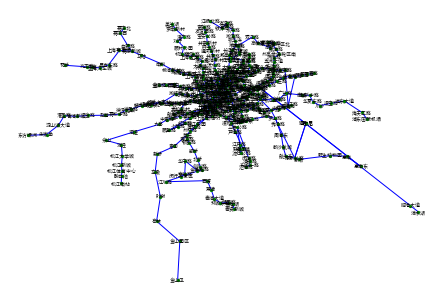

  1.Recommended shortest route: 曹杨路 --> 镇坪路 --> 长寿路 --> 江宁路 --> 汉中路 --> 曲阜路 --> 天潼路 --> 南京东路 --> 陆家嘴 --> 东昌路 --> 世纪大道 --> 上海科技馆 --> 世纪公园 --> 龙阳路
  2.The path that requires minimum transfers between two stations: 曹杨路 --> 隆德路 --> 江苏路 --> 静安寺 --> 南京西路 --> 人民广场 --> 南京东路 --> 陆家嘴 --> 东昌路 --> 世纪大道 --> 上海科技馆 --> 世纪公园 --> 龙阳路


In [32]:
#Compute distance between stations
def geo_distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    return d
def get_station_distance(station1,station2):
    return geo_distance(station_info[station1],station_info[station2])
print("  The distance between 江杨北路 and 滴水湖: "+str(get_station_distance("江杨北路","滴水湖"))+" km")
print()
#Store all stations into a list
data="""
富锦路 友谊西路 宝安公路 共富新村 呼兰路 通河新村 共康路 彭浦新村 汶水路 上海马戏城 延长路 中山北路 上海火车站 汉中路 新闸路 人民广场 黄陂南路 陕西南路 常熟路 衡山路 徐家汇 上海体育馆 漕宝路 上海南站 锦江乐园 莲花路 外环路 莘庄
浦东国际机场 海天三路 远东大道 凌空路 川沙 华夏东路 创新中路 唐镇 广兰路 金科路 张江高科 龙阳路 世纪公园 上海科技馆 世纪大道 东昌路 陆家嘴 南京东路 人民广场 南京西路 静安寺 江苏路 中山公园 娄山关路 威宁路 北新泾 淞虹路 虹桥2号航站楼 虹桥火车站 徐泾东
上海南站 石龙路 龙漕路 漕溪路 宜山路 虹桥路 延安西路 中山公园 金沙江路 曹杨路 镇坪路 中潭路 上海火车站 宝山路 东宝兴路 虹口足球场 赤峰路 大柏树 江湾镇 殷高西路 长江南路 淞发路 张华浜 淞滨路 水产路 宝杨路 友谊路 铁力路 江杨北路
宜山路 虹桥路 延安西路 中山公园 金沙江路 曹杨路 镇坪路 中潭路 上海火车站 宝山路 海伦路 临平路 大连路 杨树浦路 浦东大道 世纪大道 浦电路 蓝村路 塘桥 南浦大桥 西藏南路 鲁班路 大木桥路 东安路 上海体育场 上海体育馆 宜山路
东川路 金平路 华宁路 文井路 闵行开发区
奉贤新城 金海湖 望园路 环城东路 奉浦大道 萧塘 西渡 江川路 东川路 剑川路 北桥 颛桥 银都路 春申路 莘庄
港城路 外高桥保税区北 航津路 外高桥保税区南 洲海路 五洲大道 东靖路 巨峰路 五莲路 博兴路 金桥路 云山路 德平路 北洋泾路 民生路 源深体育中心 世纪大道 浦电路 蓝村路 上海儿童医学中心 临沂新村 高科西路 东明路 高青路 华夏西路 上南路 灵岩南路 东方体育中心
花木路 龙阳路 芳华路 锦绣路 杨高南路 高科西路 云台路 耀华路 长清路 后滩 龙华中路 东安路 肇嘉浜路 常熟路 静安寺 昌平路 长寿路 镇坪路 岚皋路 新村路 大华三路 行知路 大场镇 场中路 上大路 南陈路 上海大学 祁华路 顾村公园 刘行 潘广路 罗南新村 美兰湖
沈杜公路 联航路 江月路 浦江镇 芦恒路 凌兆新村 东方体育中心 杨思 成山路 耀华路 中华艺术宫 西藏南路 陆家浜路 老西门 大世界 人民广场 曲阜路 中兴路 西藏北路 虹口足球场 曲阳路 四平路 鞍山新村 江浦路 黄兴路 延吉中路 黄兴公园 翔殷路 嫩江路 市光路
曹路 民雷路 顾唐路 金海路 金吉路 金桥 台儿庄路 蓝天路 芳甸路 杨高中路 世纪大道 商城路 小南门 陆家浜路 马当路 打浦桥 嘉善路 肇嘉浜路 徐家汇 宜山路 桂林路 漕河泾开发区 合川路 星中路 七宝 中春路 九亭 泗泾 佘山 洞泾 松江大学城 松江新城 松江体育中心 醉白池 松江南站
基隆路 港城路 高桥 高桥西 双江路 国帆路 新江湾城 殷高东路 三门路 江湾体育场 五角场 国权路 同济大学 四平路 邮电新村 海伦路 四川北路 天潼路 南京东路 豫园 老西门 新天地 陕西南路 上海图书馆 交通大学 虹桥路 宋园路 伊犁路 水城路 龙溪路 上海动物园 虹桥1号航站楼 虹桥2号航站楼 虹桥火车站
新江湾城 殷高东路 三门路 江湾体育场 五角场 国权路 同济大学 四平路 邮电新村 海伦路 四川北路 天潼路 南京东路 豫园 老西门 新天地 陕西南路 上海图书馆 交通大学 虹桥路 宋园路 伊犁路 水城路 龙溪路 龙柏新村 紫藤路 航中路
迪斯尼 康新公路 秀沿路 罗山路 御桥 浦三路 三林东 三林 东方体育中心 龙耀路 云锦路 龙华 上海游泳馆 徐家汇 交通大学 江苏路 隆德路 曹杨路 枫桥路 真如 上海西站 李子园 祁连山路 武威路 桃浦新村 南翔 马陆 嘉定新城 白银路 嘉定西 嘉定北
迪士尼 康新公路 秀沿路 罗山路 御桥 浦三路 三林东 三林 东方体育中心 龙耀路 云锦路 龙华 上海游泳馆 徐家汇 交通大学 江苏路 隆德路 曹杨路 枫桥路 真如 上海西站 李子园 祁连山路 武威路 桃浦新村 南翔 马陆 嘉定新城 上海赛车场 昌吉东路 上海汽车城 安亭 兆丰路 花桥
金海路 申江路 金京路 杨高北路 巨峰路 东陆路 复兴岛 爱国路 隆昌路 宁国路 江浦公园 大连路 提篮桥 国际客运中心 天潼路 曲阜路 汉中路 南京西路 陕西南路 嘉善路 大木桥路 龙华中路 龙华 龙漕路 漕宝路 桂林公园 虹漕路 虹梅路 东兰路 顾戴路 虹莘路 七莘路
金运路 金沙江西路 丰庄 祁连山南路 真北路 大渡河路 金沙江路 隆德路 武宁路 长寿路 江宁路 汉中路 自然博物馆 南京西路 淮海中路 新天地 马当路 世博会博物馆 世博大道 长清路 成山路 东明路 华鹏路 下南路 北蔡 陈春路 莲溪路 华夏中路 中科路 学林路 张江路
滴水湖 临港大道 书院 惠南东 惠南 野生动物园 新场 航头东 鹤沙航城 周浦东 罗山路 华夏中路 龙阳路
虹桥火车站 诸光路 蟠龙路 徐盈路 徐泾北城 嘉松中路 赵巷 汇金路 青浦新城 漕盈路 淀山湖大道 朱家角 东方绿洲
沈杜公路 三鲁公路 闵瑞路 浦航路 东城一路 汇臻路
上海南站 春申 新桥 车墩 叶榭 亭林 金山园区 金山卫
"""
stations=[]
for line in data.split("\n"):
    stations+=re.findall("(\w+)",line)+['']

def clean_list(list_i,value):
    while value in list_i:
        list_i.remove(value)
# Build connection between notes
def build_connection_on_route(stations_info):
    stations_connection = defaultdict(list)
    data1=stations_info.copy()
    del data1[0]
    data2=stations_info.copy()
    data2.insert(0,stations_info[0]) 
    for c1 in stations_info:
        try:
            stations_connection[c1].append(data1[0])
            del data1[0]
            clean_list(stations_connection[c1],'')
        except:print
        if c1 == data2[0] : 
            del data2[0]
            continue 
        stations_connection[c1].append(data2[0])
        clean_list(stations_connection[c1],'')
        del data2[0]
    del stations_connection[''] 
    return stations_connection
build_connection_on_route=build_connection_on_route(stations)
# print(build_connection_on_route)
#Draw connection graph
stations_connection_graph = nx.Graph(build_connection_on_route)
nx.draw(stations_connection_graph, station_info,node_color= 'g',edge_color='b',with_labels=True,font_size=5,node_size=5)
plt.rcParams['font.sans-serif']=['SimHei']
plt.show()
#Optimal search using variation of BFS based on different strategy
def bfs_search(graph,start,destination,search_strategy):
    pathes = [[start]] # list is used to store the path to be searched
    visited = set() # set is used to store the searched nodes
    while pathes:
        path = pathes.pop(0) #Extract the first path
        froniter = path[-1]  #Extracting nodes to be explored
        if froniter in visited : continue #Check if the point has already been explored, do not explore again
        if froniter == destination:  #Check if the destination is already searched
            return path# ！
        successsors = graph[froniter] #All child nodes join successsors
        for station in successsors:
            if station in path: continue  # check loop
            new_path = path+[station]  #New path
            pathes.append(new_path)  #bfs#Add new path to list
        pathes = search_strategy(pathes)
        visited.add(froniter) #All child nodes at this point have been traversed 

def get_distance_of_path(path):
    distance = 0
    for i,_ in enumerate(path[:-1]):
        distance += get_station_distance(path[i],path[i+1])
    return distance
def sort_by_distance(pathes):
    return sorted(pathes,key=get_distance_of_path)

def count_transfer(path):
    transfer_num = 0
    num_of_close_station=0
    # if(get_station_distance(path[-1],destination))<1.2:
    #     del(path[-1])
    for i in path:
        num_of_close_station=len(build_connection_on_route[i])
        if (num_of_close_station)==1:
            transfer_num +=1
    return transfer_num

def sort_by_num_of_transfer(pathes):
    return sorted(pathes,key=count_transfer)

inquiry_result=" --> ".join(bfs_search(build_connection_on_route,"曹杨路","龙阳路",search_strategy=sort_by_distance)) 
print("  1.Recommended shortest route: "+inquiry_result)
inquiry_result=" --> ".join(bfs_search(build_connection_on_route,"曹杨路","龙阳路",search_strategy=sort_by_num_of_transfer)) 
print("  2.The path that requires minimum transfers between two stations: "+inquiry_result)